<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_14128\1708678202.py:13: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DS\PCA\wine.csv")


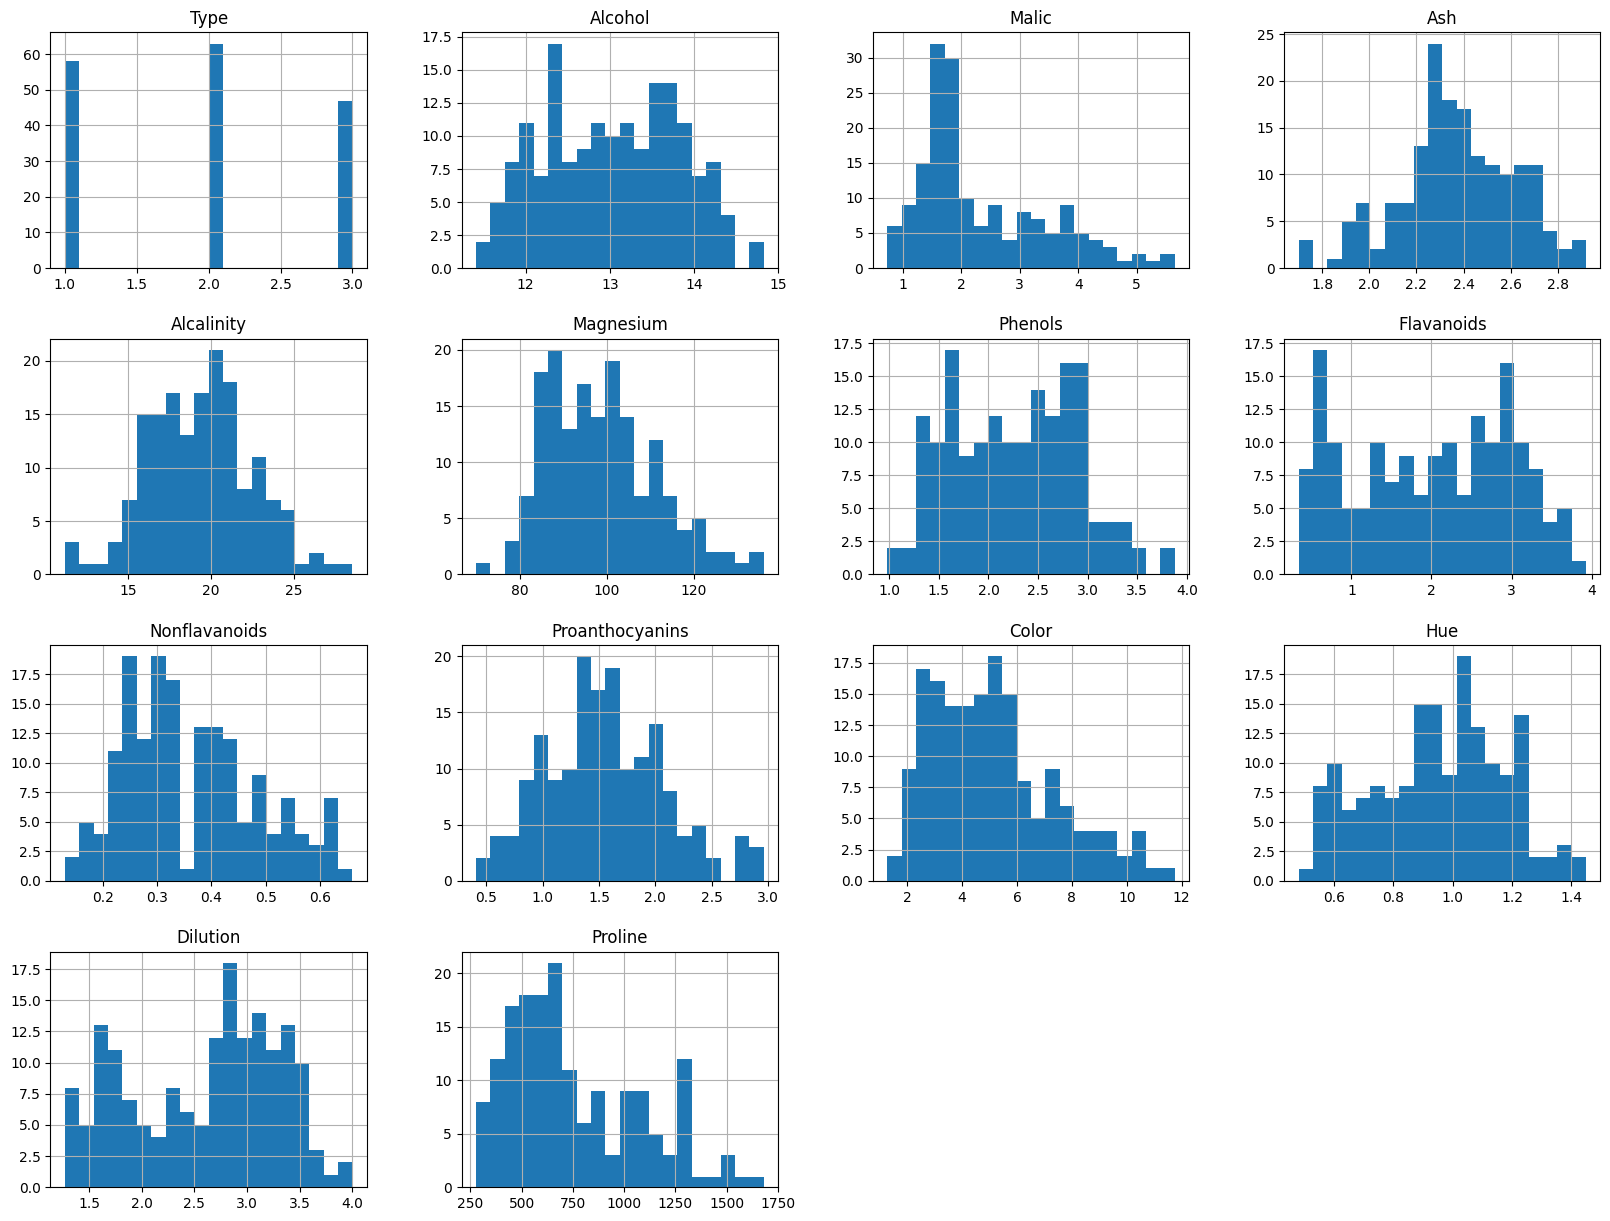

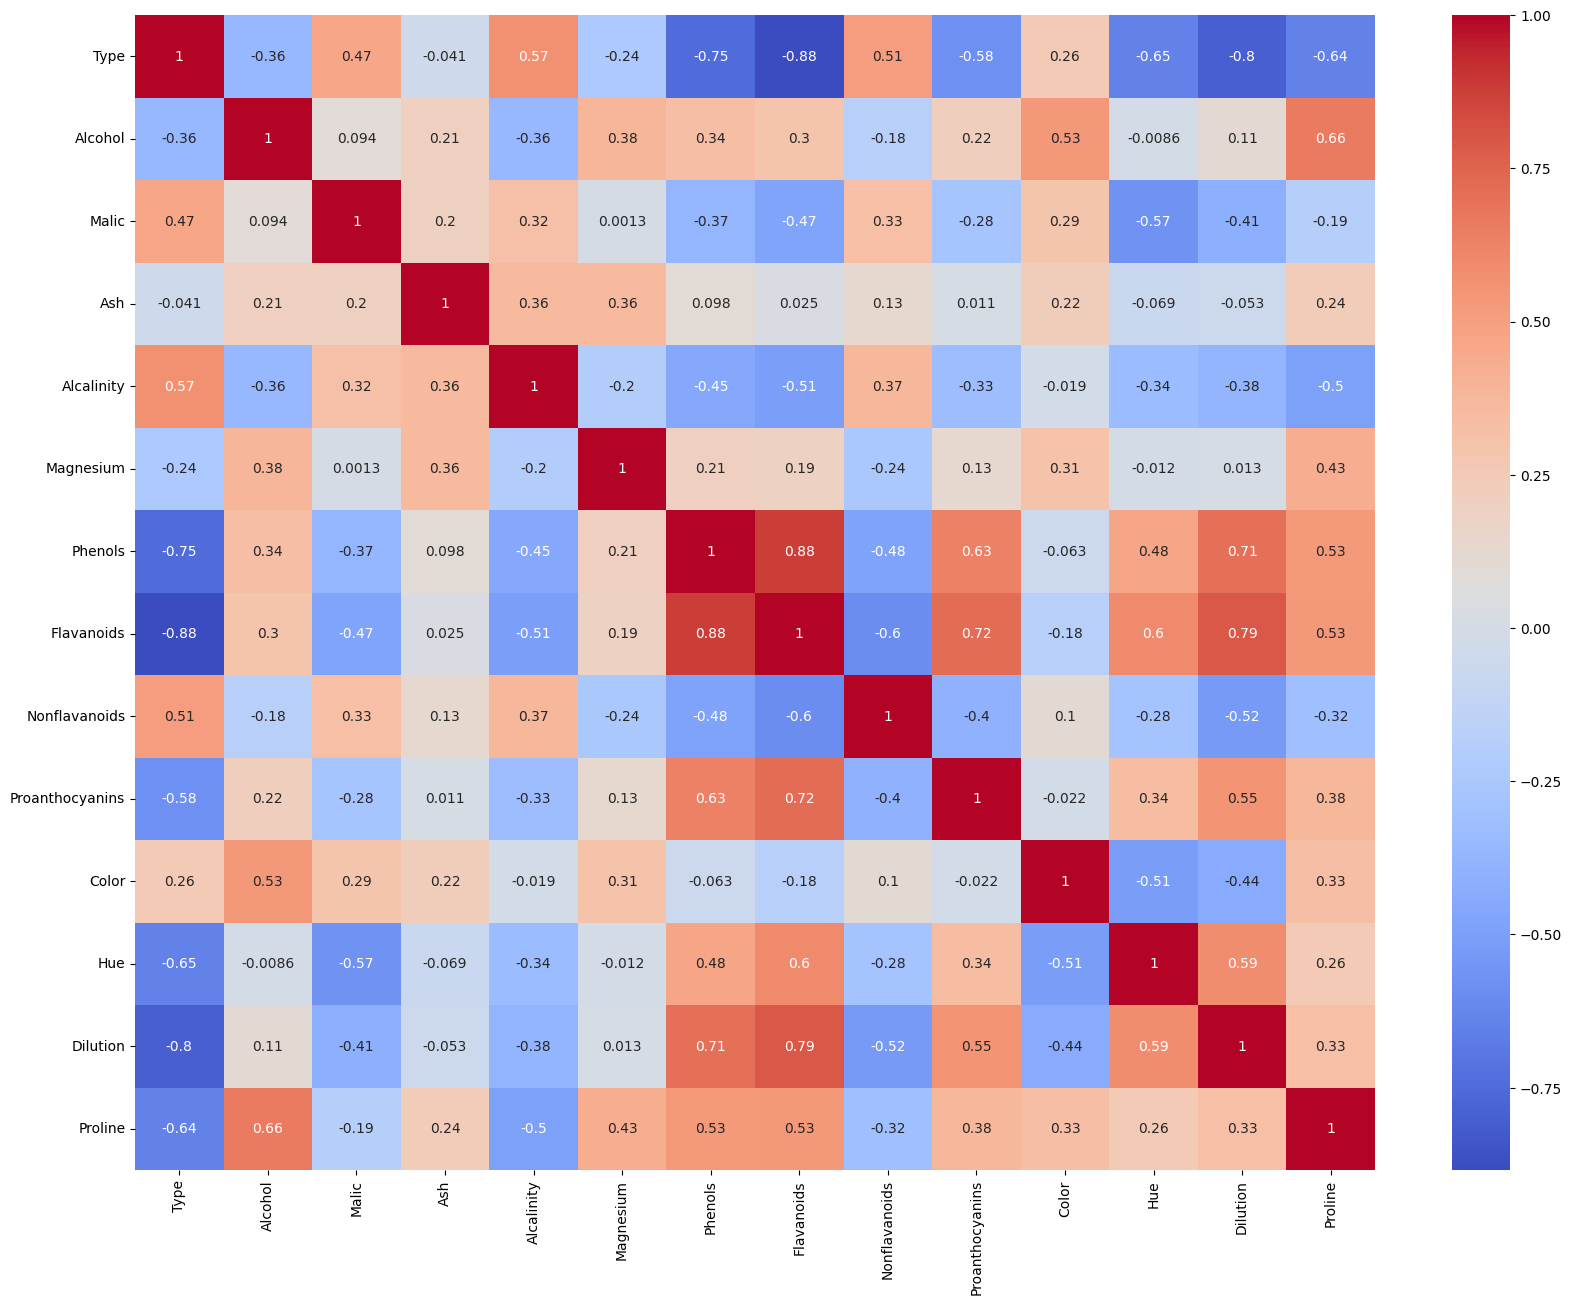

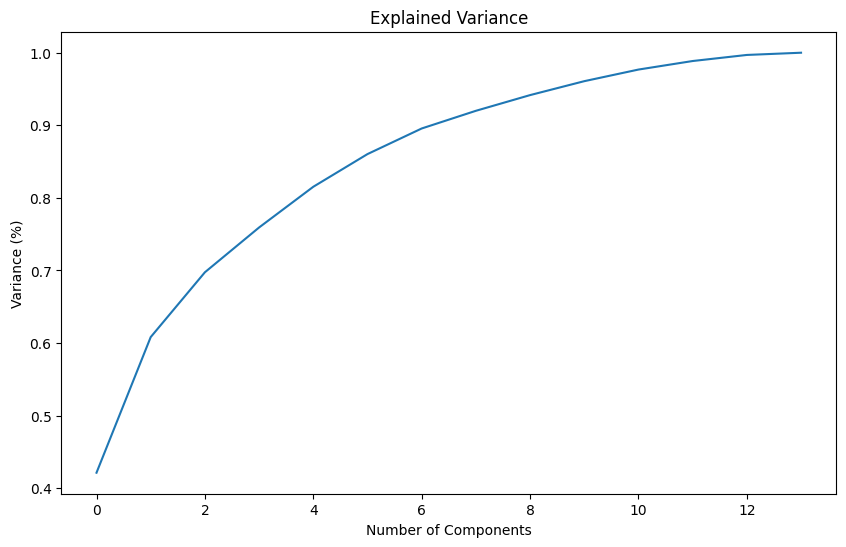

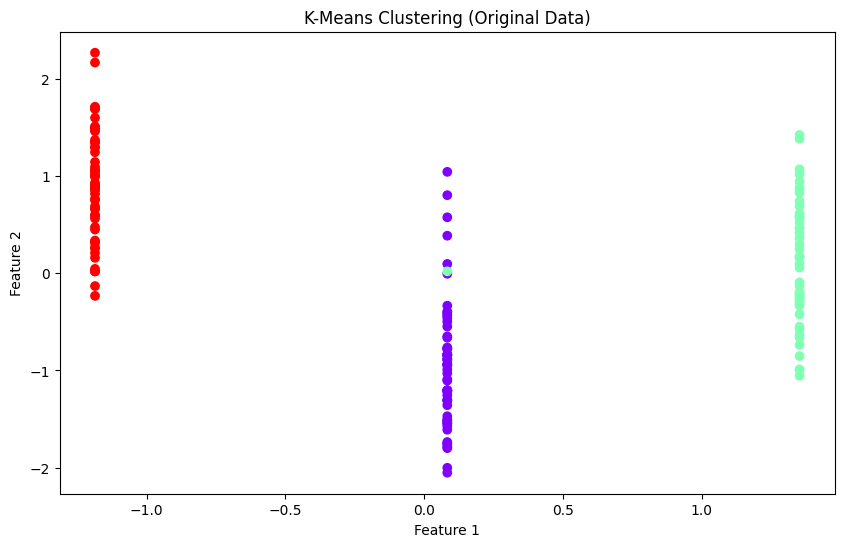

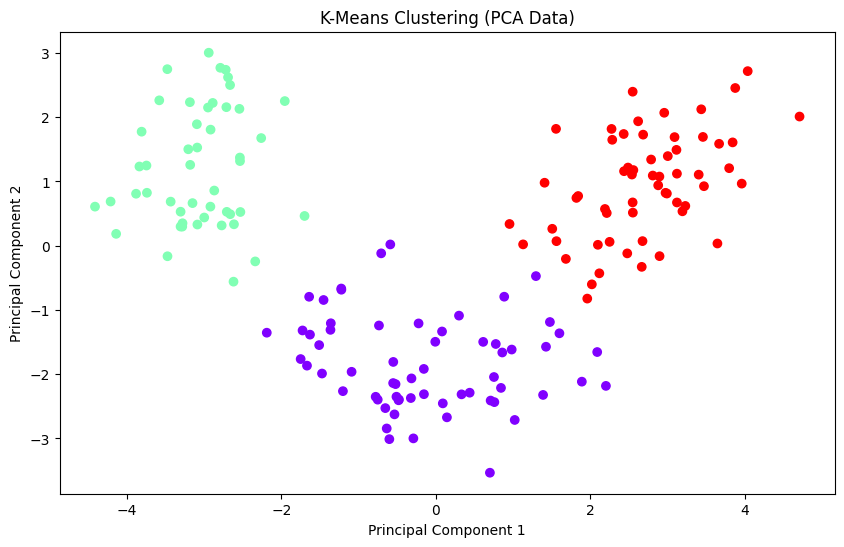

{'Silhouette Score (Original)': 0.3210238771705942, 'Davies-Bouldin Index (Original)': 1.2494440337606831, 'Silhouette Score (PCA)': 0.3548615845721277, 'Davies-Bouldin Index (PCA)': 1.1307235080066251}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("D:\DS\PCA\wine.csv")

# Data Preprocessing
df = df.dropna()  # Drop missing values

# Outlier detection and removal
z_scores = np.abs((df - df.mean()) / df.std())
df = df[(z_scores < 3).all(axis=1)]

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Exploratory Data Analysis
# Distribution analysis
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Dimensionality Reduction with PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

# Choose the number of components that explain at least 90% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1

# Ensure at least 2 components for visualization purposes
if n_components < 2:
    n_components = 2

# Transform the data
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Clustering with Original Data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters_original = kmeans.fit_predict(scaled_data)

silhouette_original = silhouette_score(scaled_data, kmeans_clusters_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_clusters_original)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters_original, cmap='rainbow')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Clustering with PCA Data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters_pca = kmeans.fit_predict(pca_data)

silhouette_pca = silhouette_score(pca_data, kmeans_clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_clusters_pca)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_clusters_pca, cmap='rainbow')
plt.title('K-Means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compare Clustering Results
comparison_results = {
    "Silhouette Score (Original)": silhouette_original,
    "Davies-Bouldin Index (Original)": davies_bouldin_original,
    "Silhouette Score (PCA)": silhouette_pca,
    "Davies-Bouldin Index (PCA)": davies_bouldin_pca
}

print(comparison_results)


**Summary of key findings :**
1.Data Preprocessing : cleaned the datset by removing missing values and outliers then standardized it
2. Exploratory data analysis (EDA) : Distribution analysis and correlation matrix provided Key insights for preprocessing 
3. Dimensionality Reduction : PCA reduced the dataset's dimensionality retaining at least 90% of the variance
4. Clustering Analysis :
        a. Original data : K-Mean clustering yielded a Silhouette Score of 0.321 and a Davies Bouldin index of 10249
        b. PCA-Transformed Data : Improved clustering performance with a Silhouette Score of 0.355 and a Davies-Bouldin index of 1.131
5. Visulaization : Clustering results were clearer in the PCA-reduced space 


**Pratical Implications of Using PCA and Clustering**

1. PCA :
       a. reduces dimensionality and computational complexity
       b. Eliminates noise, focusing on significant features
       c. Improves data visulization
2. Clustering
       a.Identifies patterns and groups similar data points
       b.Summarizes large datasets
       c.Enhances feature engineering for predictive models
   

**Recommendations for Using PCA and Clustering**
1. Use PCA :
       a.For high-dimensional data to reduce complexity
       b. As a preprocessing step before clustering pr other algorithms
       c. to reduce noise and highlight key features

2. Use Clustering :
       a. For exploratory data analysis to identify natural groupings
       b. In market segmentation and anomaly detection 
